# 03_feature_engineering.ipynb  
Adding temporal features: rolling windows, EMA, lags  
Goal: capture trends and drift over time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/cleaned_data_baseline.csv')
print("Loaded shape:", df.shape)
print("Columns:", df.columns.tolist())

Loaded shape: (10000, 8)
Columns: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'Type_L', 'Type_M']


In [3]:
# 1. Rolling mean over ~4 hours (240 minutes)
df['tool_wear_roll_4h']   = df['Tool wear [min]'].rolling(240, min_periods=1).mean()
df['torque_roll_4h']      = df['Torque [Nm]'].rolling(240, min_periods=1).mean()
df['rpm_roll_4h']         = df['Rotational speed [rpm]'].rolling(240, min_periods=1).mean()

# 2. EMA (smooth trend, very simple)
df['tool_wear_ema']   = df['Tool wear [min]'].ewm(alpha=0.1).mean()
df['torque_ema']      = df['Torque [Nm]'].ewm(alpha=0.1).mean()

# 3. One important lag (1 hour back)
df['tool_wear_lag_1h'] = df['Tool wear [min]'].shift(60)

print("Added 6 new columns")
print(df.columns[-6:].tolist())

Added 6 new columns
['tool_wear_roll_4h', 'torque_roll_4h', 'rpm_roll_4h', 'tool_wear_ema', 'torque_ema', 'tool_wear_lag_1h']


In [4]:
df = df.ffill().fillna(0)
print("Missing values now:", df.isna().sum().sum())

Missing values now: 0


Saved. New shape: (10000, 14)


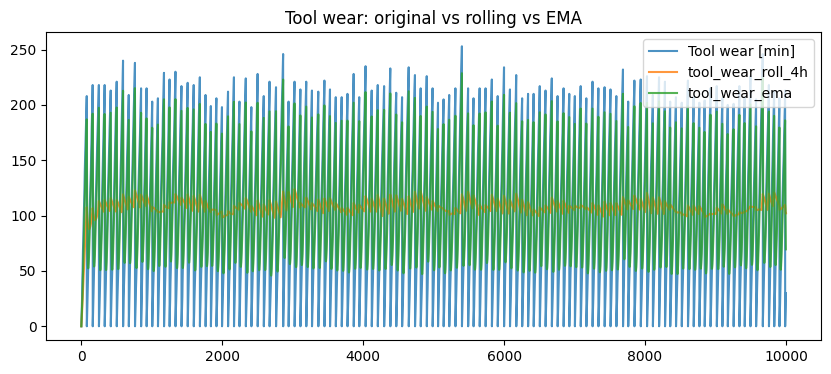

In [5]:
df.to_csv('../data/processed/data_short_temporal.csv', index=False)
print("Saved. New shape:", df.shape)

# Very quick visual check
df[['Tool wear [min]', 'tool_wear_roll_4h', 'tool_wear_ema']].plot(figsize=(10,4), alpha=0.8)
plt.title("Tool wear: original vs rolling vs EMA")
plt.show()